Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Upload data

In [3]:
ATM_data = pd.read_csv("ATM_sample.csv")
# YOUR CODE HERE that produces test_error among everything else 
# print(test_error)
ATM_data

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,1018,10,1,0,0,0,72.750556
1,974,10,1,1,0,0,66.720482
2,96,2,0,0,0,1,19.189516
3,958,9,1,1,0,1,67.388669
4,103,4,0,1,0,1,15.813127
...,...,...,...,...,...,...,...
21995,1015,12,1,0,0,0,71.384290
21996,101,2,0,1,0,0,16.031066
21997,96,3,0,1,0,0,14.968847
21998,991,6,1,0,0,0,73.705665


In [4]:
ATM_data.describe()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
count,22000.000000,22000.000000,22000.00000,22000.000000,22000.000000,22000.000000,22000.000000
mean,731.637318,7.937455,0.70200,0.714091,0.102455,0.301591,54.652818
std,411.869245,3.673415,0.45739,0.451857,0.303252,0.458959,25.099767
min,80.000000,0.000000,0.00000,0.000000,0.000000,0.000000,11.668197
25%,105.000000,4.000000,0.00000,0.000000,0.000000,0.000000,18.500386
50%,989.000000,9.000000,1.00000,1.000000,0.000000,0.000000,68.240749
75%,1007.000000,11.000000,1.00000,1.000000,0.000000,1.000000,71.345778
max,1083.000000,17.000000,1.00000,1.000000,1.000000,1.000000,103.964065



| Variable | Description |
| --- | --- |
|Withdraw | The total cash withdrawn a day (in 1,000th of local currency units)|
|  |
|Shops | Number of shops/restaurants within a walkable distance|
|  |  |
|ATMs | Number of other ATMs within a walkable distance |
| |  |
|Downtown =1 | if the ATM is in downtown, 0 if not|
|  |  |
|Workday = 1 | if the day is workday, 0 if holiday|
|  | |
|Center =1 | if the ATM is located in a center (shopping, airport, etc.), 0 if not|
|  |  |
|High =1 | if the ATM had a high cash demand in the last month, 0 if not|
|  | |

In [5]:
ATM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Shops     22000 non-null  int64  
 1   ATMs      22000 non-null  int64  
 2   Downtown  22000 non-null  int64  
 3   Weekday   22000 non-null  int64  
 4   Center    22000 non-null  int64  
 5   High      22000 non-null  int64  
 6   Withdraw  22000 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.2 MB


In [6]:
correlations = ATM_data.corr()
correlations['Withdraw']


Shops       0.985797
ATMs        0.824030
Downtown    0.983574
Weekday    -0.050470
Center      0.088103
High        0.021275
Withdraw    1.000000
Name: Withdraw, dtype: float64

<Axes: >

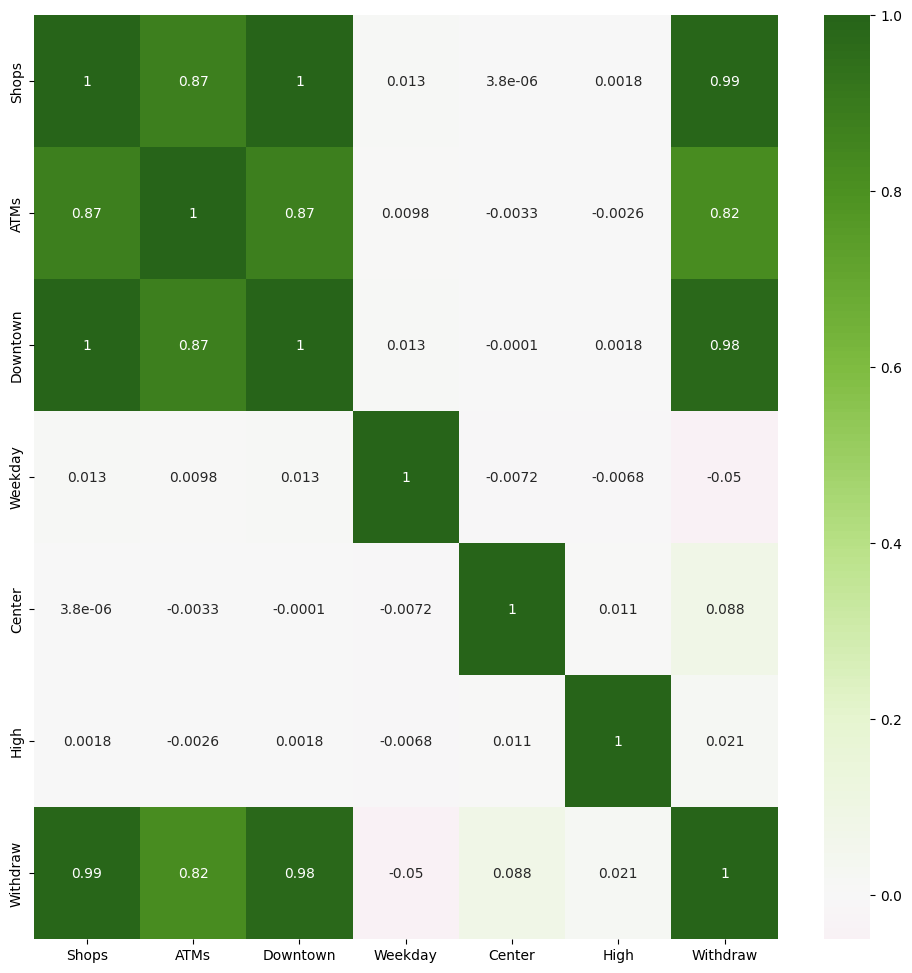

In [7]:
plt.figure(figsize=(12, 12)) 
sns.heatmap(ATM_data.corr(),  cmap='PiYG', center=0, annot=True)

Possible collinearity - note prior to any cleaning
- Downtown
- ATM
- Shops


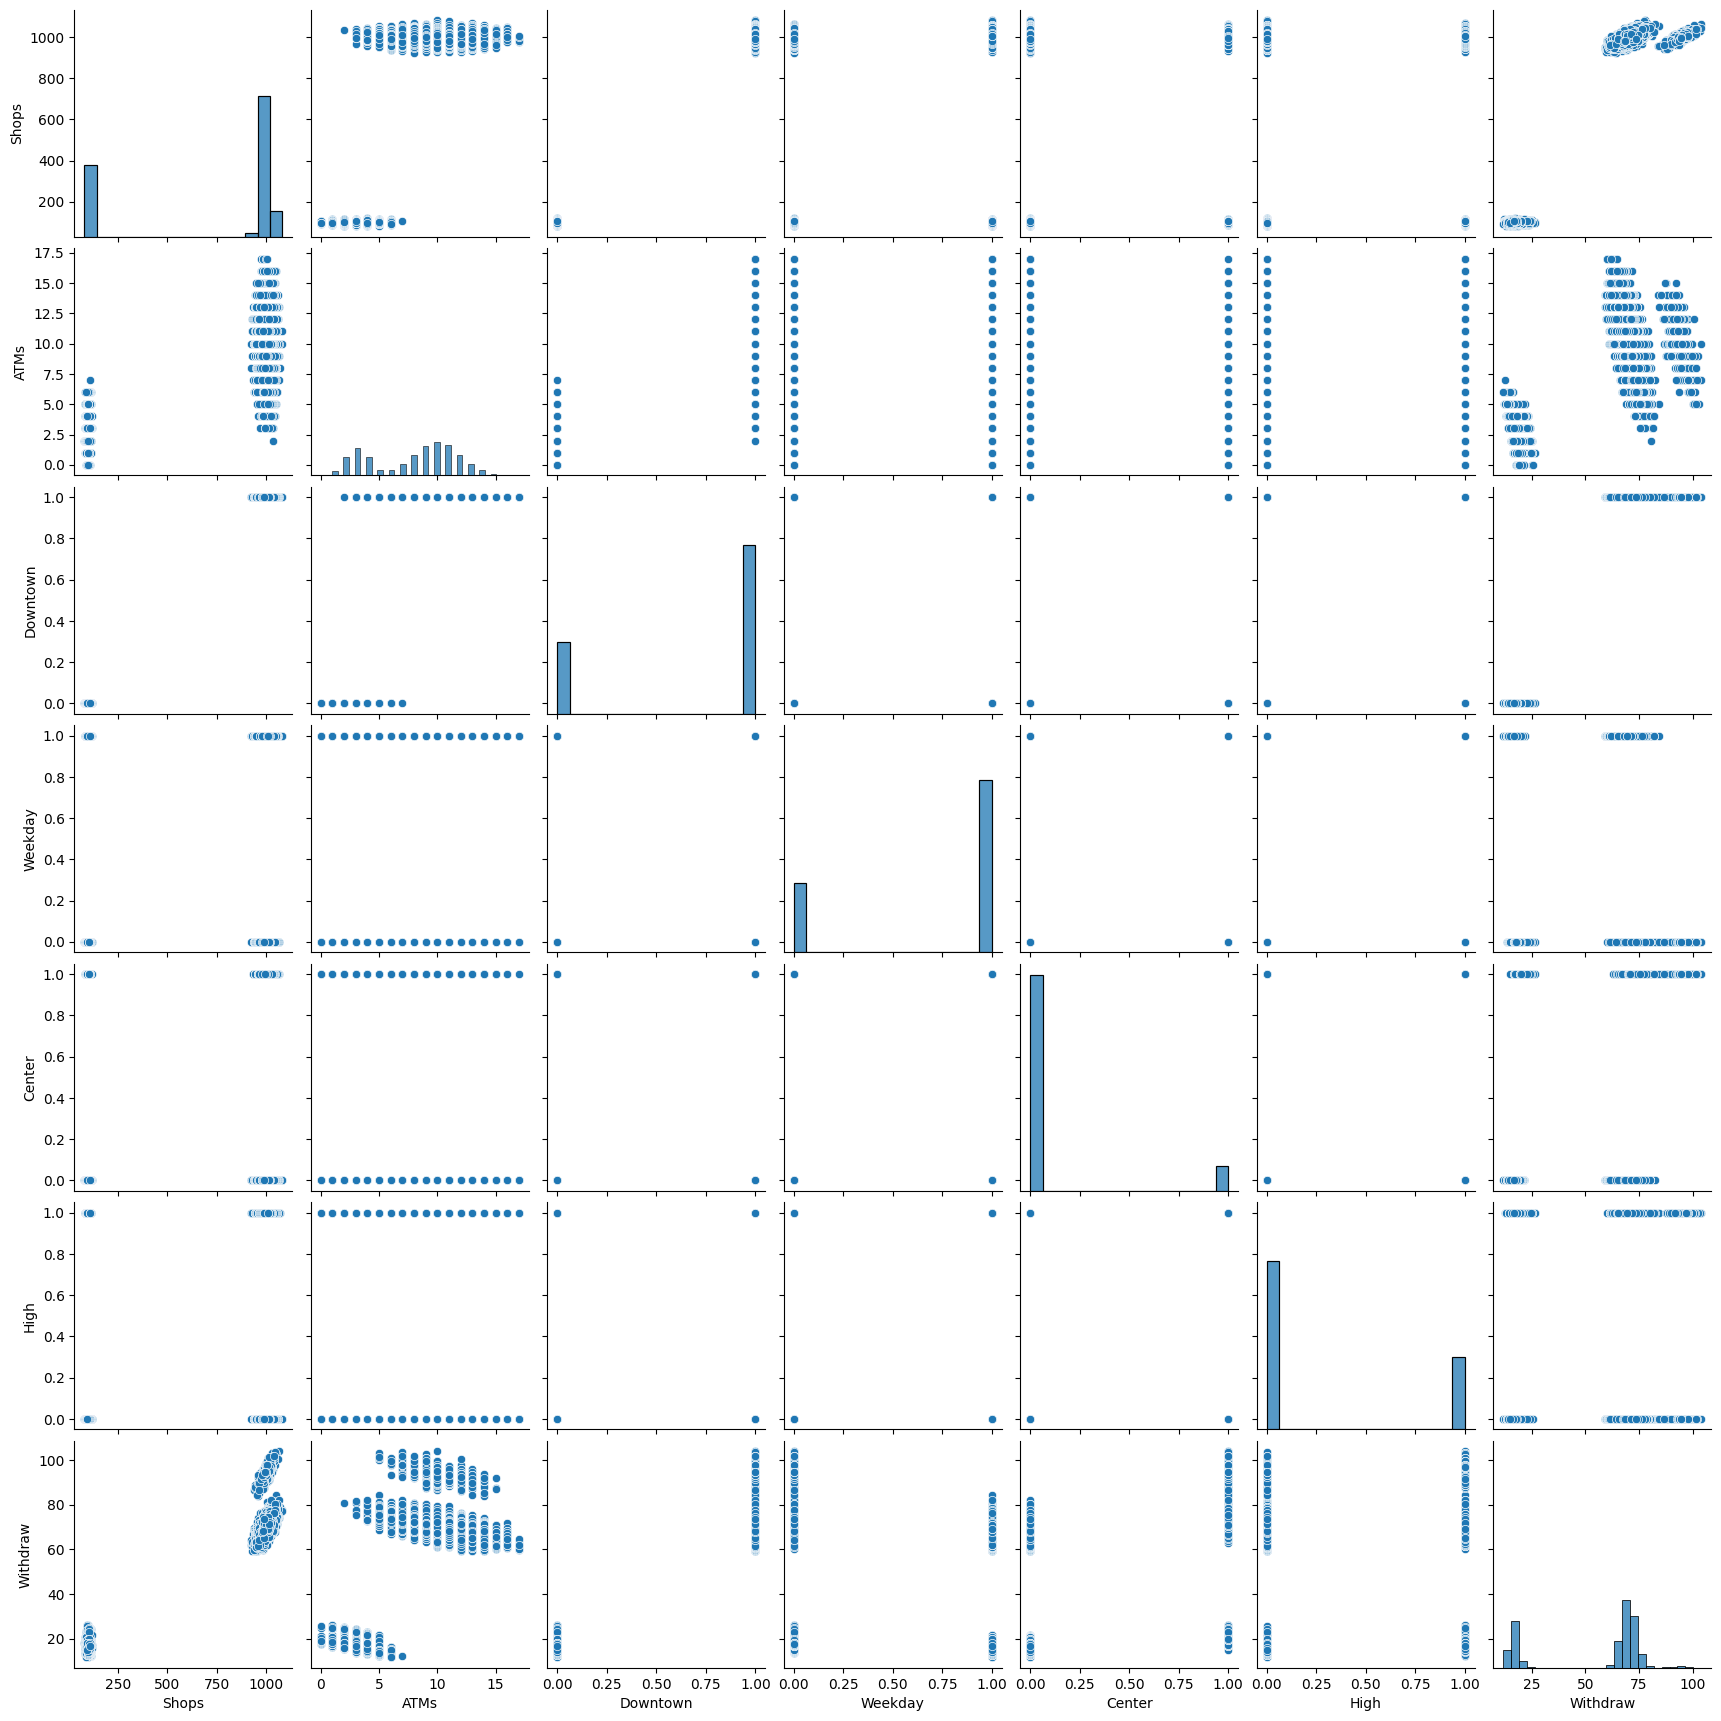

In [8]:
sns.pairplot(ATM_data)

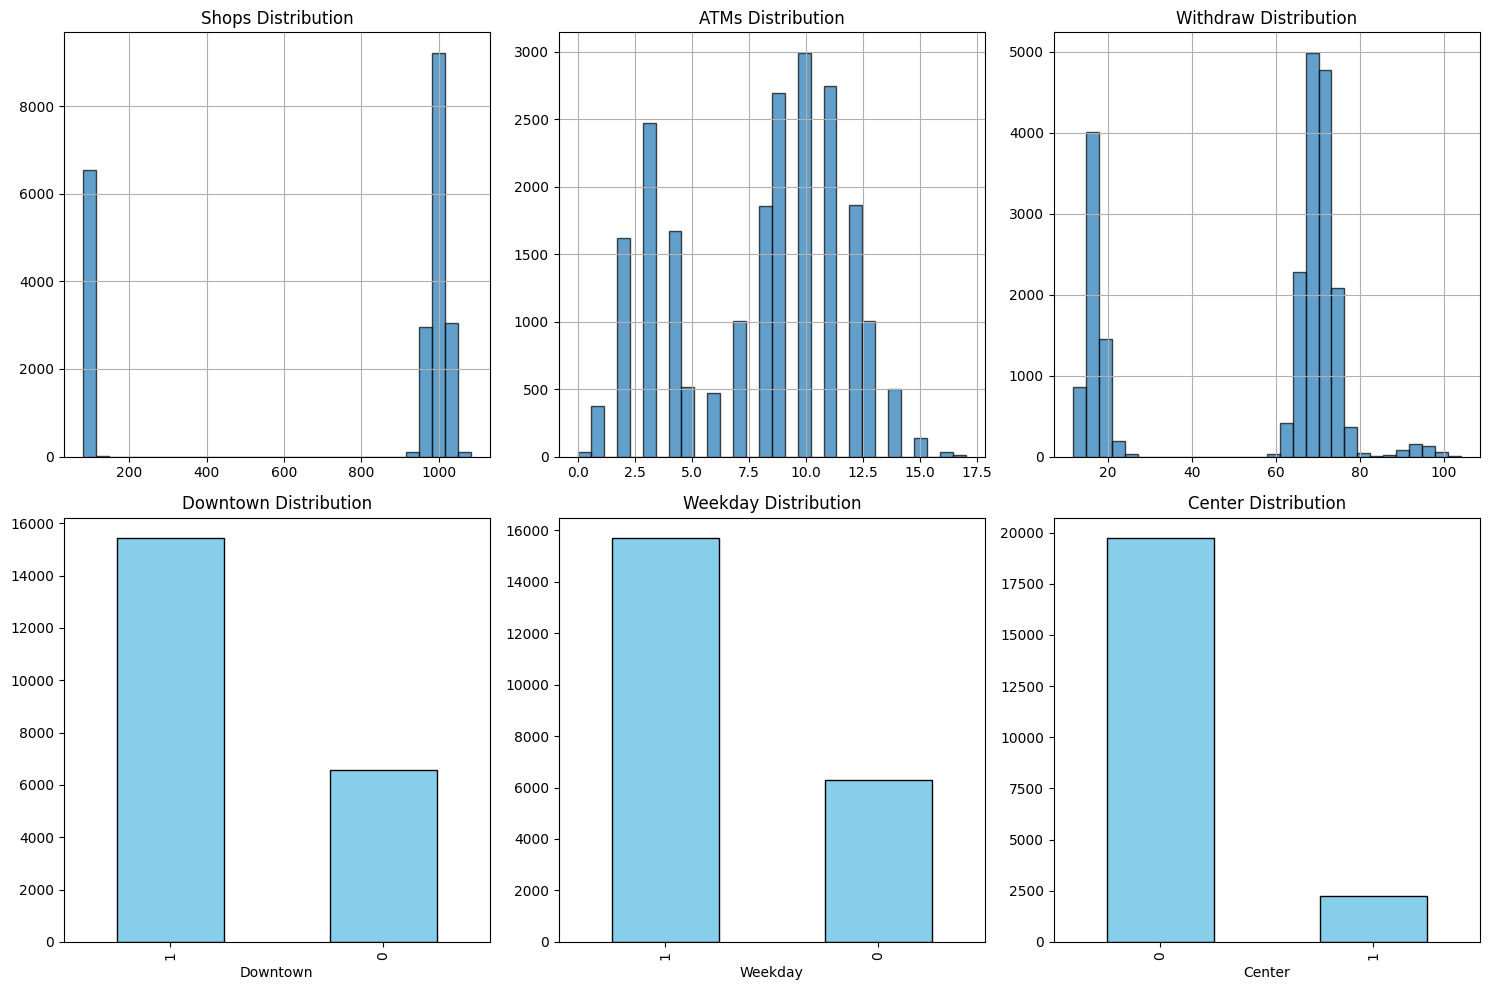

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Numeric variable histograms
ATM_data[['Shops', 'ATMs', 'Withdraw']].hist(bins=30, ax=axes[0], edgecolor='black', alpha=0.7)

# Binary variable bar plots
ATM_data['Downtown'].value_counts().plot(kind='bar', ax=axes[1, 0], color='skyblue', edgecolor='black', title="Downtown Distribution")
ATM_data['Weekday'].value_counts().plot(kind='bar', ax=axes[1, 1], color='skyblue', edgecolor='black', title="Weekday Distribution")
ATM_data['Center'].value_counts().plot(kind='bar', ax=axes[1, 2], color='skyblue', edgecolor='black', title="Center Distribution")

axes[0, 0].set_title('Shops Distribution')
axes[0, 1].set_title('ATMs Distribution')
axes[0, 2].set_title('Withdraw Distribution')

plt.tight_layout()
plt.show()